Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Haitham Alhad Hyder"
COLLABORATORS = ""

---

# CS110 Pre-class Work 6.2

## Part A. Median-of-3 partitioning quicksort 

## Question 1.

Read through the following Python code. What does each function (i.e., median, qsort, randomized_qsort, test_qsort) do? Comment in details each function. 


In [2]:
import timeit
import random

eps = 1e-16
N = 10000
locations = [0.0, 0.5, 1.0 - eps]


def median(x1, x2, x3):
    """
    Identifies the median value among 3 values

    :param x1:
        Input 1
    :param x2:
        Input 2
    :param x3:
        Input 3
    
    :return
        The median value
    """
    if (x1 < x2 < x3) or (x3 < x2 < x1):
        return x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1):
        return x3
    else:
        return x1

def qsort(lst):
    """
    Performs the quick-sort algorithm

    :param lst:
        The input list

    :returns the sorted list
    """
    indices = [(0, len(lst))]

    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = median(*values)

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])

        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst


def randomized_quicksort():
    """
    Generates a list then randomly shuffles it before running the quick-sort algorithm on it

    :returns a sorted list
    """
    lst = [i for i in range(N)]
    random.shuffle(lst)
    return qsort(lst)


def test_quicksort():
    """
    Checks if the output of randomized_quicksort is sorted
    """
    lst = randomized_quicksort()
    assert (lst == [i for i in range(N)])


# Is our algorithm correct
test_quicksort()

# How fast is our algorithm
print(timeit.timeit(randomized_quicksort, number=1))

0.07121505299999953


## Question 2.

What are the main differences between the `randomized_quicksort` in the code and $RANDOMIZED-QUICKSORT$ in Cormen et al., besides that the partition of `randomized_quicksort` uses a median of 3 as a pivot?

There are a couple of differences:
1. Cormen uses recursion while our implementation uses a looping structure
2. Cormen randomises the index position of the partition, while in our implementation we shuffle the input instead as a means of introducting randomness.

## Question 3.
What is the time complexity of this `randomized_qsort`? Time the algorithm on lists of various lengths, each list being a list of the first $n$ consecutive positive integers. Produce a graph with list lengths on the x axis and running time on the y axis. As always, don’t forget to time the algorithm several times for each list’s length and then average the results. 

Text(0.5,1,'Analysis of the randomised_quicksort algorithm')

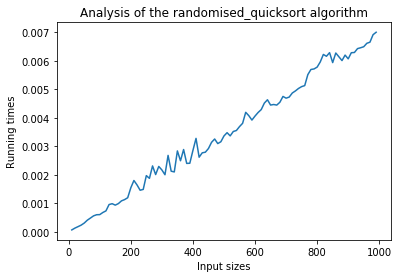

In [3]:
import time
from typing import List
import numpy as np
import matplotlib.pyplot as plt

def randomized_quicksort(n: int) -> List:
    """
    Randomly sorts a consecutively generated list

    :param n:
        The number of values to generate 

    :returns a sorted list
    """
    lst: List = [i for i in range(n)]
    random.shuffle(lst)
    return qsort(lst)

iterations: int = 100  # Number of times to run the algorithm before averaging

min_n, max_n, step = 10, 1000, 10

running_times: List = []
for n in range(min_n, max_n, step):
    current_running_times: List = []
    for i in range(iterations):
        start_time = time.time()
        randomized_quicksort(n)
        current_running_times.append(time.time() - start_time)
    running_times.append(np.mean(current_running_times))

%matplotlib inline

plt.plot(
    list(range(min_n, max_n, step)),
    running_times
    )
plt.xlabel('Input sizes')
plt.ylabel('Running times')
plt.title('Analysis of the randomised_quicksort algorithm')

## Question 4.

### Question 4a.

Change the `qsort()` function in a way that you **don’t** separate the items that are equal to the partition. 


In [ ]:
def qsort(lst):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 4b.

Now time the algorithm on the same inputs you have used in question 3, adding one more line in the previous graph you have produced. 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Question 5.

### Question 5a.

Remove the median-of-3 partitioning, and just use the first element in the array. 

In [ ]:
def qsort(lst):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 5b.

Does this change the running time of your algorithm? Justify your response with a graph. 



In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Part B. Recursive quicksort. 

One main difference between the quicksort algorithms in Cormen et al. and the implementation in the code above is that quick sort (in the code in this notebook) is not recursive, while $QUICKSORT$ in Cormen et al. is. Given the limitation of Python so that it can only make 500 recursive calls, estimate the maximum size of the list that can be sorted by Python if a recursive quicksort is to be used. Explicitly state all assumptions you make in getting to an answer.


YOUR ANSWER HERE